In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))
import pandas as pd
import numpy as np

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/train-images-idx3-ubyte
fashionmnist



In [3]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
num_classes = 10
epochs = 20


In [4]:
import pandas as pd



train_df = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_train.csv',sep=',')
test_df = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_test.csv', sep = ',')

In [5]:
train_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train_df = np.array(train_df, dtype = 'float32')
test_df = np.array(test_df, dtype='float32')




In [7]:
m, n = train_df.shape
y_train=train_df[:,0]
x_train=train_df[:,1:]/255
print(y_train)
y_test=test_df[:,0]
x_test=test_df[:,1:]/255

[2. 9. 6. ... 8. 8. 7.]


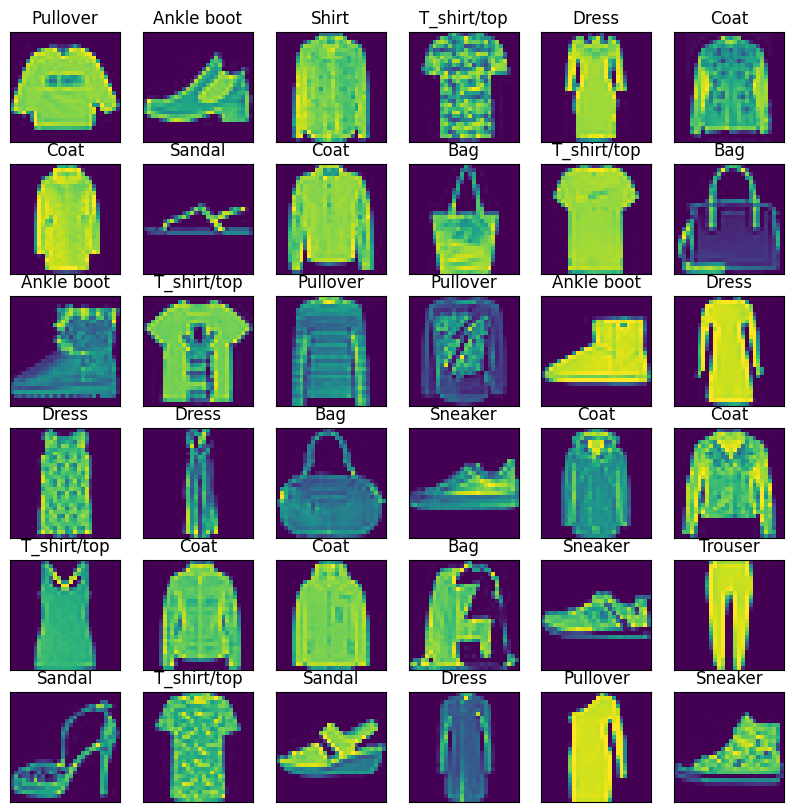

In [8]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)))
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

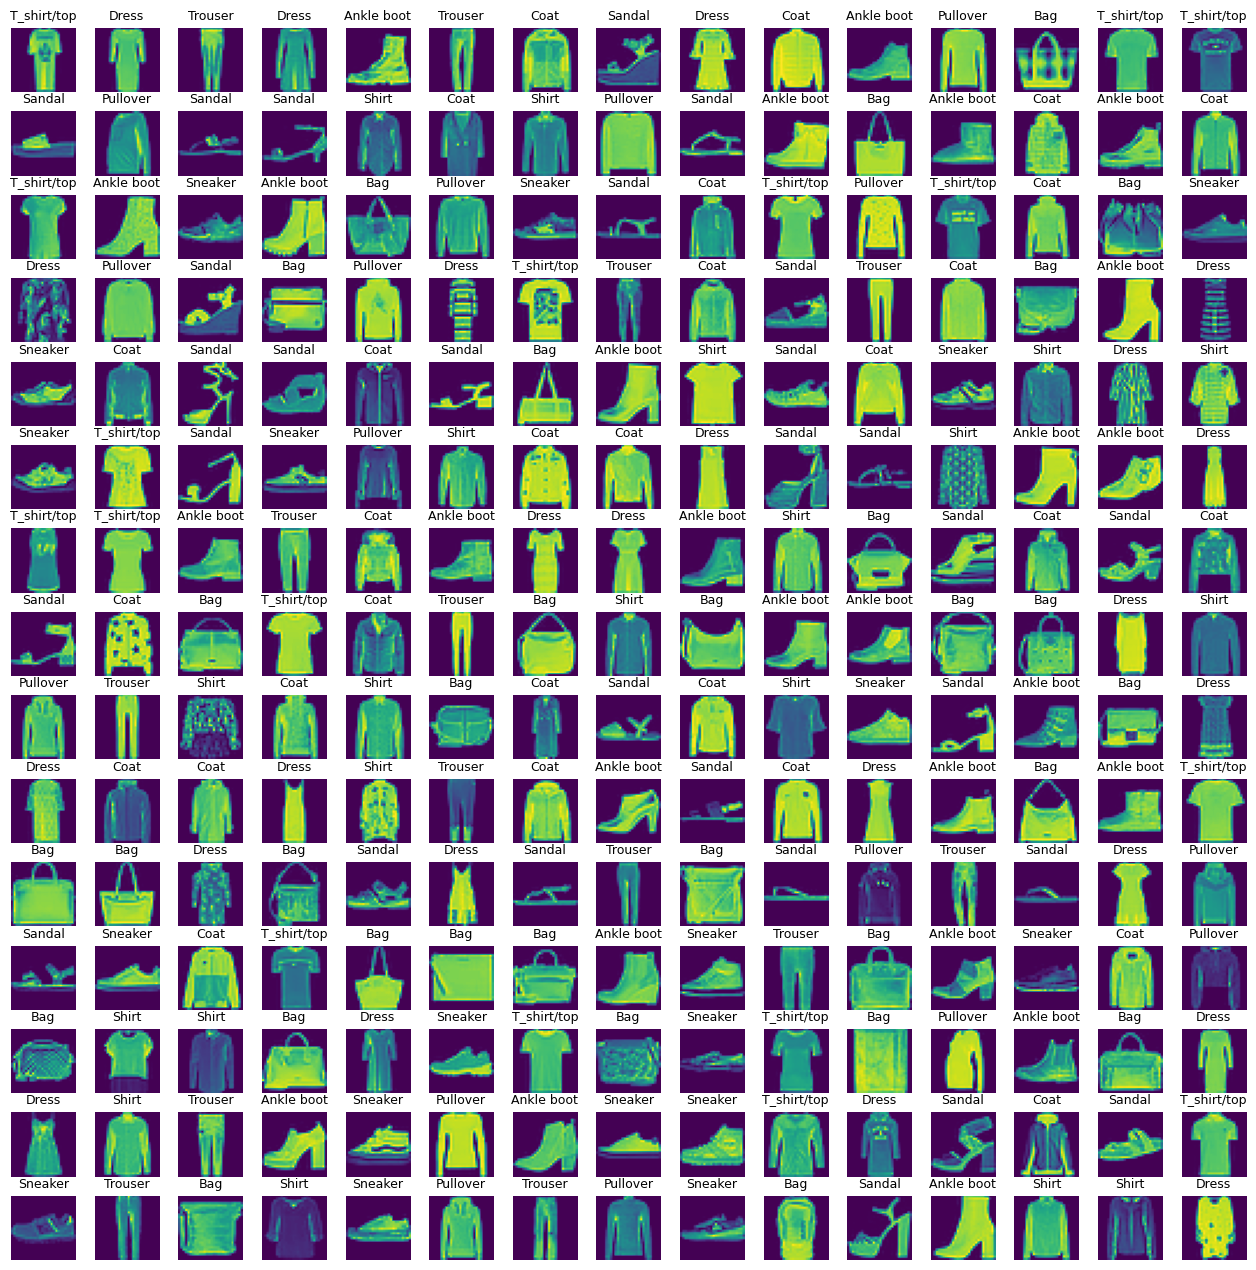

In [9]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (16,16))
axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array
n_train = len(train_df) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow( train_df[index,1:].reshape((28,28)) )
    labelindex = int(train_df[index,0])
    axes[i].set_title(class_names[labelindex], fontsize = 9)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.3)

In [10]:
image_rows=28
image_cols=28
batch_size=4096
image_shape=(image_rows,image_cols,1)
x_validate = x_test.copy()
y_validate = y_test.copy()



In [11]:
x_train=x_train.reshape(x_train.shape[0],*image_shape)
x_test=x_test.reshape(x_test.shape[0],*image_shape)
x_validate=x_validate.reshape(x_validate.shape[0],*image_shape)

In [12]:
cnn_model = Sequential([
    Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = image_shape),
    MaxPooling2D(pool_size=2) ,# down sampling the output instead of 28*28 it is 14*14
    Dropout(0.2),
    Flatten(), # flatten out the layers
    Dense(32,activation='relu'),
    Dense(10,activation = 'softmax')
    
])

In [13]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [14]:
history = cnn_model.fit(
    x_train,
    y_train,
    batch_size=4096,
    epochs=75,
    verbose=1,
    validation_data=(x_validate,y_validate),
)

Epoch 1/75
15/15 [==============================] - 18s 1s/step - loss: 1.6176 - accuracy: 0.4847 - val_loss: 0.9559 - val_accuracy: 0.7055
Epoch 2/75
15/15 [==============================] - 17s 1s/step - loss: 0.7554 - accuracy: 0.7440 - val_loss: 0.6167 - val_accuracy: 0.7821
Epoch 3/75
15/15 [==============================] - 17s 1s/step - loss: 0.5810 - accuracy: 0.7911 - val_loss: 0.5461 - val_accuracy: 0.8073
Epoch 4/75
15/15 [==============================] - 18s 1s/step - loss: 0.5159 - accuracy: 0.8167 - val_loss: 0.4844 - val_accuracy: 0.8310
Epoch 5/75
15/15 [==============================] - 17s 1s/step - loss: 0.4794 - accuracy: 0.8298 - val_loss: 0.4494 - val_accuracy: 0.8510
Epoch 6/75
15/15 [==============================] - 17s 1s/step - loss: 0.4482 - accuracy: 0.8420 - val_loss: 0.4276 - val_accuracy: 0.8550
Epoch 7/75
15/15 [==============================] - 18s 1s/step - loss: 0.4300 - accuracy: 0.8495 - val_loss: 0.4128 - val_accuracy: 0.8601
Epoch 8/75
15/15 [==

Text(0.5, 1.0, 'Train - Accuracy')

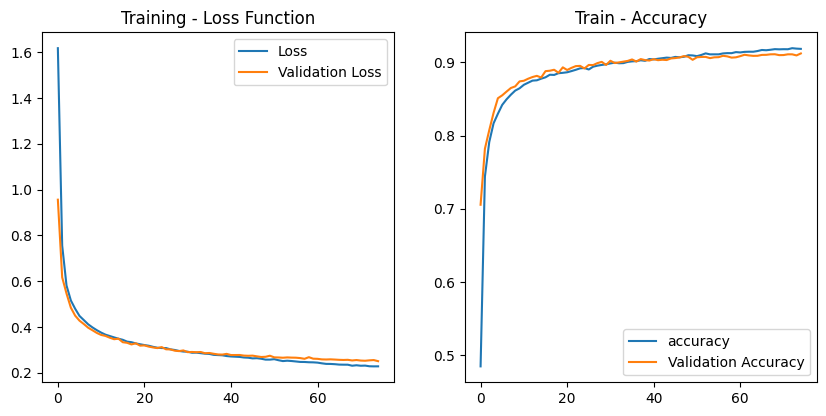

In [15]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [16]:
score = cnn_model.evaluate(x_test,y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 0.2506
Test Accuracy : 0.9122


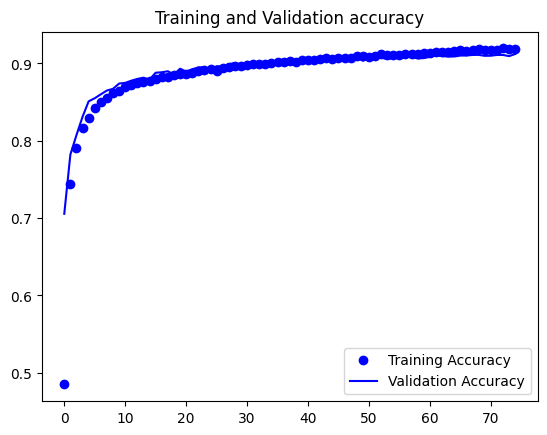

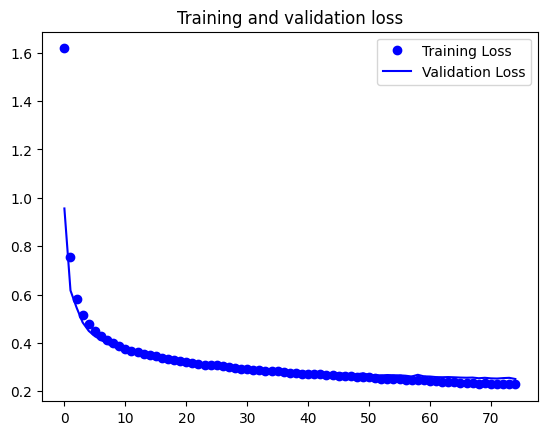

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [18]:
test_loss, test_accuracy = cnn_model.evaluate(x_test, y_test, verbose=0)

print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss:.4f}')

Test Accuracy: 91.22%
Test Loss: 0.2506
